In [ ]:
import os
os.path()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gwpy
from gwpy.timeseries import TimeSeries

In [3]:
cached_data = np.loadtxt('../Data_cached/ROC_bbh.dat')
cached_data.shape


(101, 2)

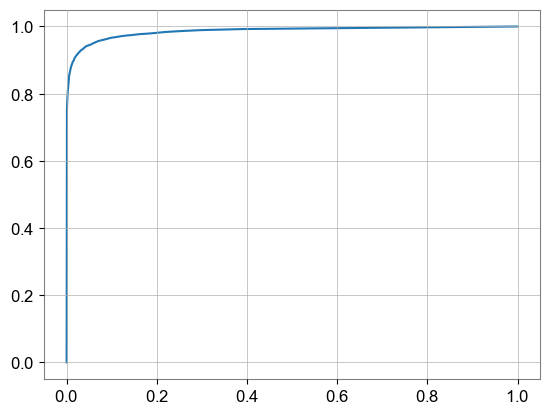

In [4]:
plt.plot(cached_data[:,0],cached_data[:,1])

In [23]:
file = "/Volumes/Research/GWNMMAD_data/Train_Data/TRAIN_PROCESS/BBH.npy"
data = np.load(file)

In [10]:
data = data.reshape(-1,)

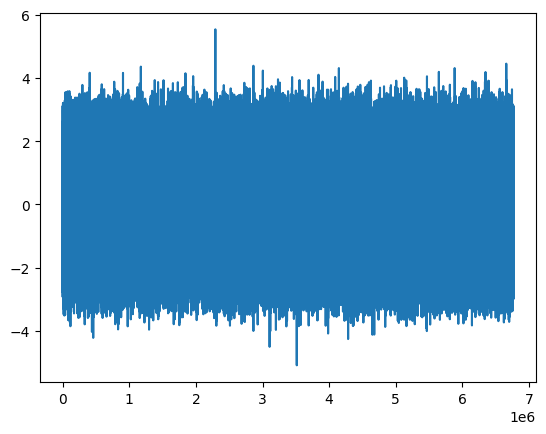

In [11]:
plt.plot(data)

In [3]:
file = "/Volumes/Research/GWNMMAD_data/Tw_dataset/Datasets/background.npz"
data_combination = np.load(file)
data_combination.files
data = data_combination['data']

In [4]:
data_single_0 = data[:,0,:]
data_single_0_gwfied = TimeSeries(data_single_0.flatten(), dt = 1/4096)

(-5.0, 5.0)

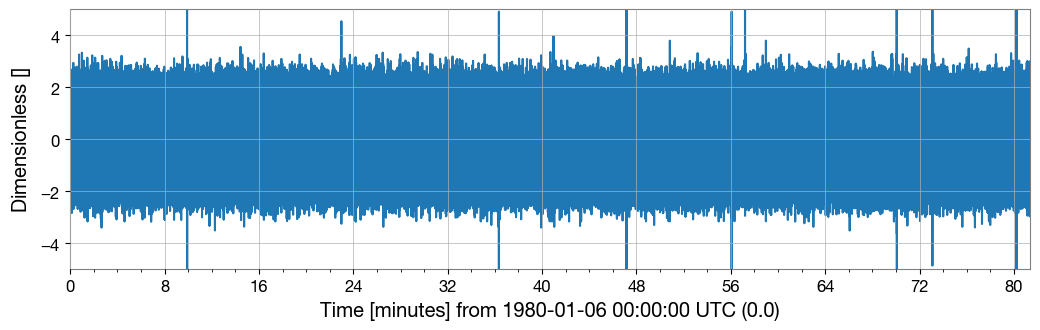

In [5]:
data_single_0_gwfied.plot()
plt.ylim(-5,5)

In [79]:
np.argwhere((data_single_0_glitches_removed.flatten() < -4) or (data_single_0_glitches_removed.flatten() > 4))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
data_single_0_glitches_removed = data_single_0
empty = np.array([])
while True:
    removal_arguments = np.argwhere(data_single_0_glitches_removed.flatten() > 4).flatten()[0]
    if removal_arguments == empty:
        break
    data_single_0_glitches_removed = np.delete(data_single_0_glitches_removed, removal_arguments//200, 0)


/var/folders/2v/3ndz_6mx79z7p4z3mfgc3kvc0000gn/T/ipykernel_75927/2056463303.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if removal_arguments == empty:


IndexError: index 0 is out of bounds for axis 0 with size 0

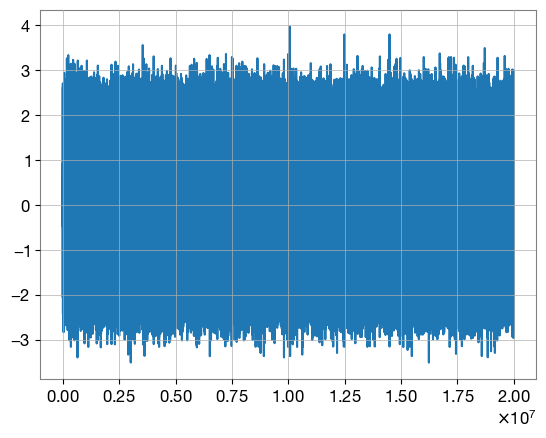

In [7]:
plt.plot(data_single_0_glitches_removed.flatten())

In [5]:
data_single_1 = data[:,1,:]

In [6]:
data_single_1.shape

(100000, 200)

In [60]:
np.argwhere(data_single_1.flatten() > 10).flatten()

array([10530760, 10530761, 13248295, 13248296, 13248297,
       13248298, 13248299, 13248308, 13248309, 13248310,
       13248311, 13248312, 13248313, 13248314, 13248315,
       13248316, 13248317, 13248318, 13248856, 13248857,
       13248858, 13248859, 13248860, 13248869, 13248870,
       13248871, 13248872, 13248873, 13248874, 13248875,
       13248876, 13248877, 13248878, 13248879])

In [11]:
13248318//200

66241

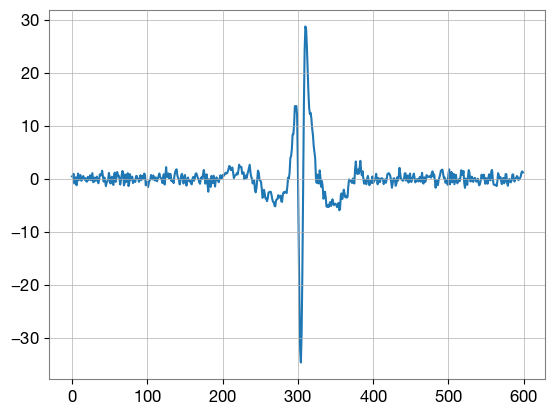

In [63]:
plt.plot(data_single_1[int(13248318/200)-1:int(13248318/200)+2].flatten())

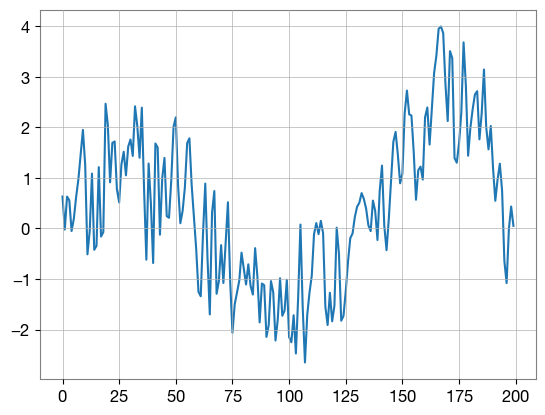

In [55]:
plt.plot(data_single_1[np.argwhere(data_single_1.mean(axis = 1) > 0.2)].flatten())

In [8]:
data_single_1

array([[-1.25096175, -0.95855157,  0.94997294, ...,
         0.82529191,  0.40796463, -0.21042227],
       [-0.02978683, -0.15513659, -0.32712013, ...,
         0.13461775,  1.40842105,  0.11178541],
       [-0.61207828, -0.46881478,  0.0829569 , ...,
        -0.15513659, -0.32712013, -0.19736512],
       ...,
       [-0.8691844 ,  0.11999158,  0.42448763, ...,
         1.04059958,  0.34299788, -0.0331056 ],
       [-0.67076066, -1.27768468, -0.49526618, ...,
        -0.83186671, -1.39495834, -1.50598335],
       [-0.14635175,  0.48672533, -0.24825882, ...,
        -0.54524873, -0.26164681, -0.21185292]])

In [11]:
data_single_1_gwfied = TimeSeries(data_single_1.flatten(), dt = 1/4096)

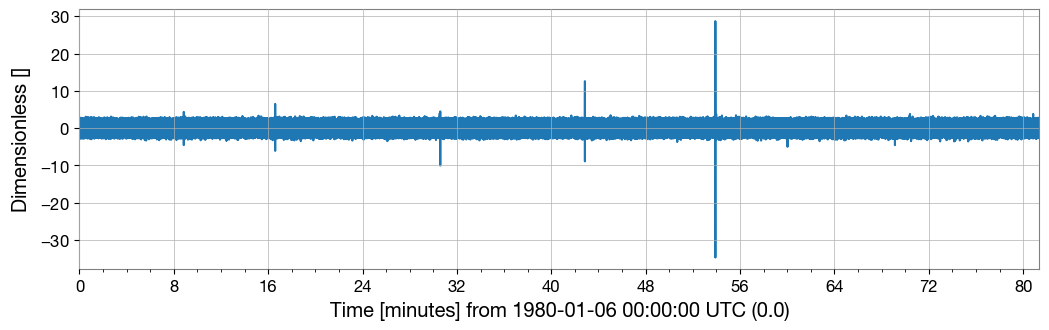

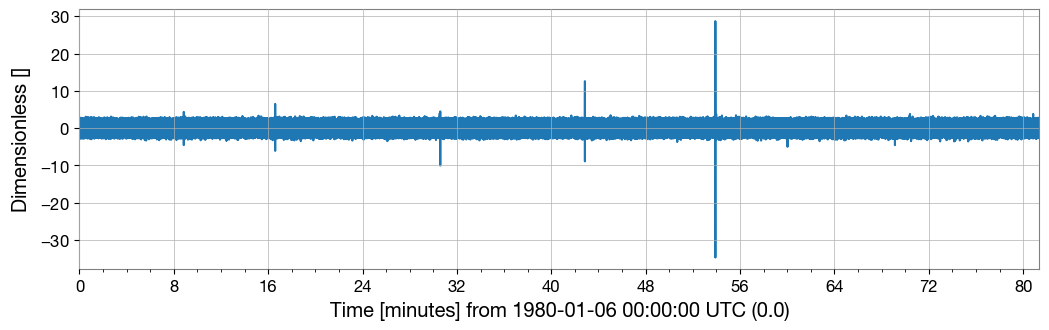

In [12]:
data_single_1_gwfied.plot()

(30, 1000)

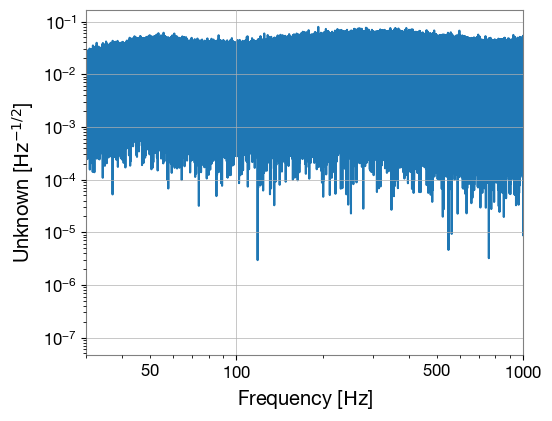

In [20]:
data_single_1_gwfied.asd().plot()
plt.xlim(30, 1000)

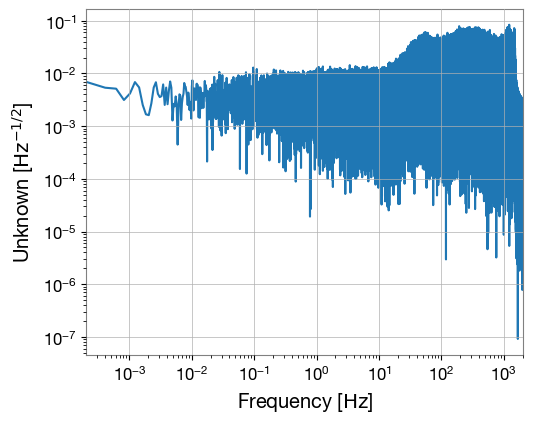

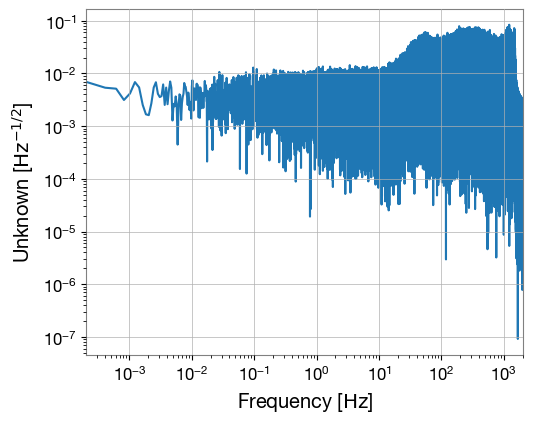

In [21]:
data_single_1_gwfied.asd().plot()

In [16]:
data_single_1_gwfied_cut = data_single_1_gwfied.bandpass(30, 1000)

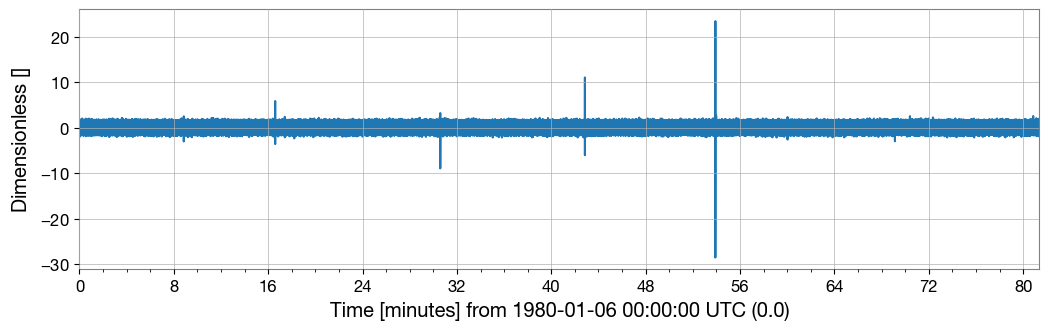

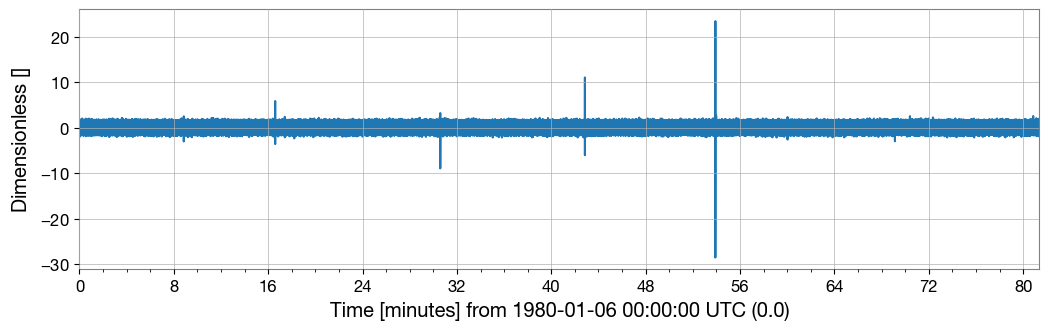

In [22]:
data_single_1_gwfied_cut.plot()

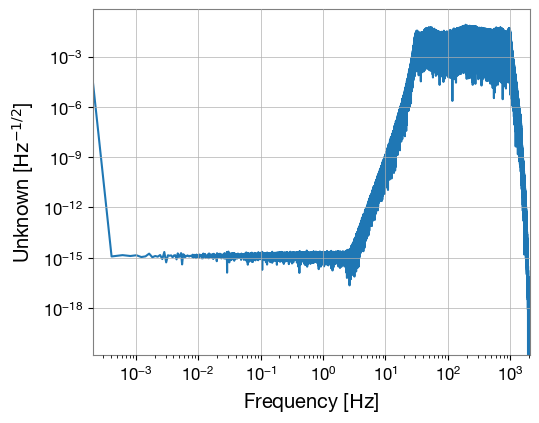

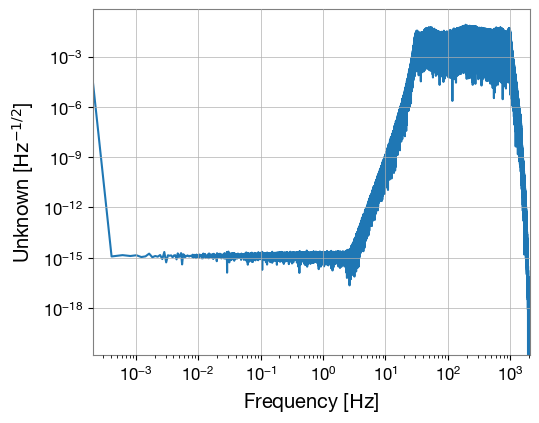

In [23]:
data_single_1_gwfied_cut.asd().plot()

In [42]:
output_initial_4k_value = data_single_1_gwfied_cut.value

In [9]:
output_initial_4k_value = data_single_0_glitches_removed.flatten()

In [10]:
average = 0
output_list = np.zeros(int(len(output_initial_4k_value)/4))

for i in range(len(output_initial_4k_value)):
    average = average + output_initial_4k_value[i]
    if i%4 == 3:
        output_list[int(i/4)] = average / 4
        average = 0
        
assert output_list[-1] != 0

np.save("/Volumes/Research/GWNMMAD_data/Train_Data/Tw_dataset_downsampled.npy", output_list)

In [45]:
output_initial_4k_value[0:4].mean()

1.136137253121406

In [44]:
output_list[0]

1.136137253121406

In [17]:
data_single_1_gwfied_whitened = data_single_1_gwfied_cut.whiten(method = 'median', highpass = 30)

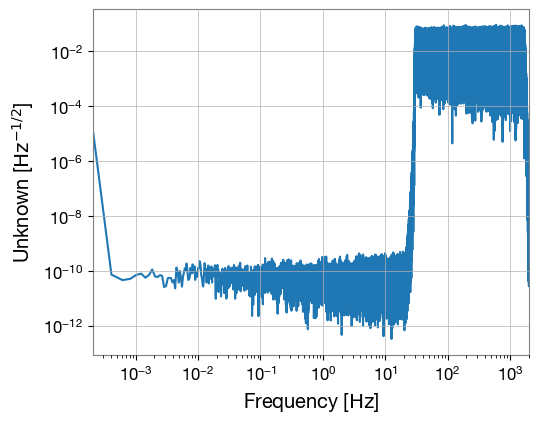

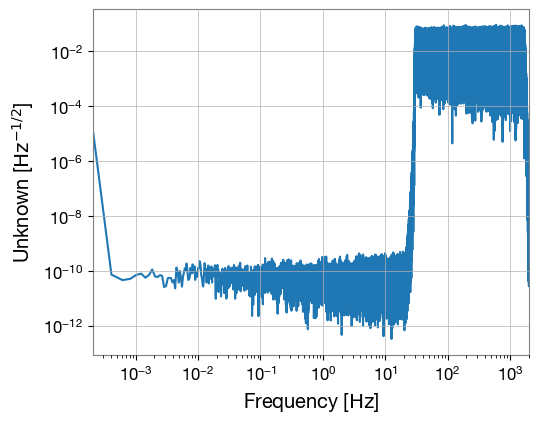

In [18]:
data_single_1_gwfied_whitened.asd().plot()

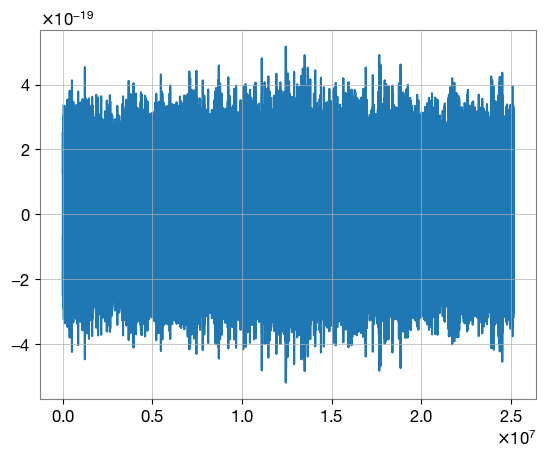

In [4]:
file = "/Volumes/Research/GWNMMAD_data/Downsampled/V1/L-L1_GWOSC_O2_4KHZ_R1-1187291136-4096_downsampled.csv"
data = pd.read_csv(file).to_numpy().flatten()
plt.plot(data)

In [33]:
data_gwfied = TimeSeries(data, unit = 1, t0 = 0, dt = 1/1024)
print(data_gwfied)

TimeSeries([1.25649390e-19, 1.28935617e-19, 1.29683226e-19, ...,
            3.03478301e-20, 2.35567373e-20, 1.59990277e-20]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 0.0009765625 s,
           name: None,
           channel: None)


/opt/homebrew/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


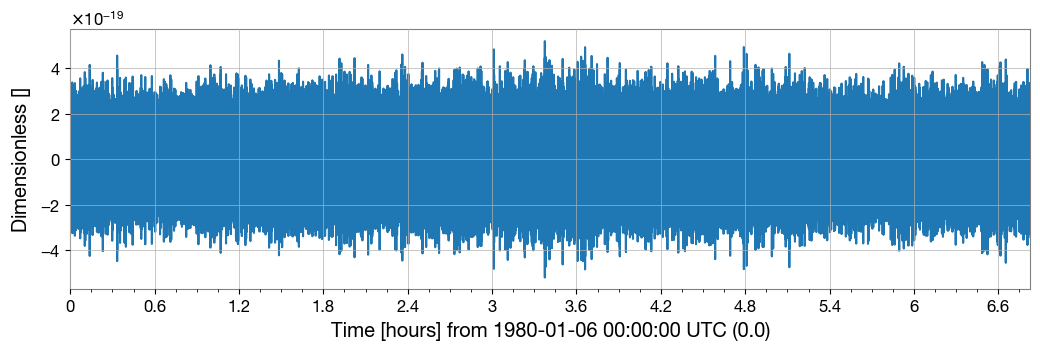

In [34]:

data_gwfied.plot().show()

In [34]:
data_gwfied = data_gwfied.highpass(30)

In [41]:
data_gwfied = data_gwfied.whiten(method='median', highpass=30)

In [36]:
spectrum = data_gwfied.asd()

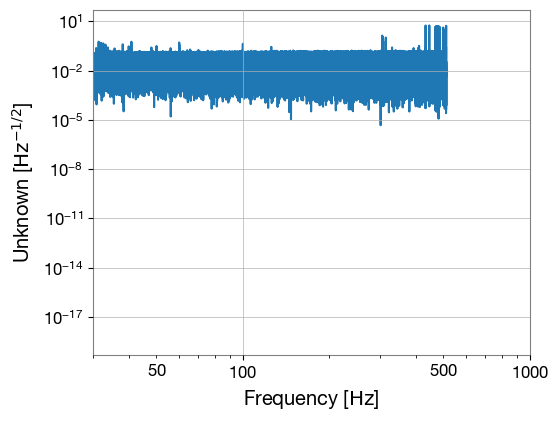

In [37]:
spectrum.plot()
plt.xlim(30, 1000)
plt.show()

In [7]:
print(spectrum)

FrequencySeries([2.37606243e-23, 1.68012230e-23, 1.76829299e-28,
                 ..., 2.26409653e-23, 2.44861752e-23,
                 2.20984677e-23]
                unit: 1 / Hz(1/2),
                f0: 0.0 Hz,
                df: 4.06901057835462e-05 Hz,
                epoch: 0.0,
                name: None,
                channel: None)


In [39]:
data_gwfied.value

array([-0.00082171, -0.02319364, -0.00239233, ..., -0.03078978,
        0.03081266, -0.0276182 ])

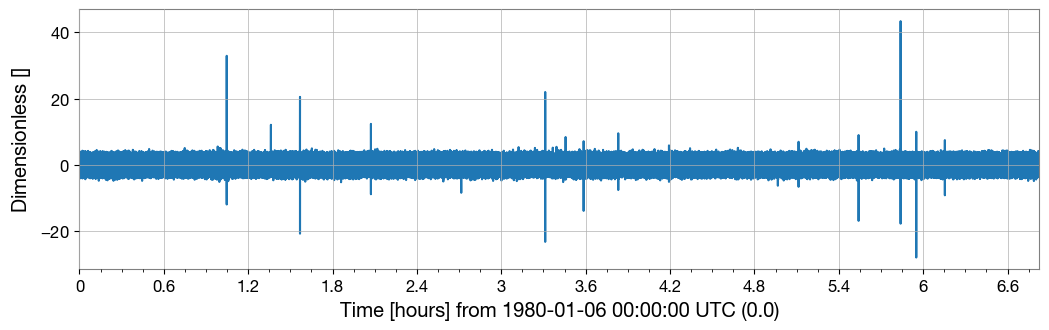

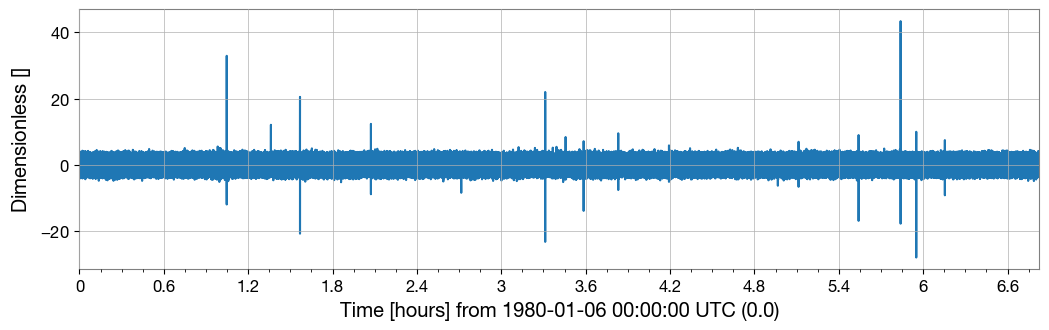

In [42]:
data_gwfied.plot()

In [4]:
TPR_glitches_01 = 0.03946086763862355
TPR_SG_01 = 0.06460886491996357
TPR_BBH_01 = 0.7911441110596792
TPR_test_01 = 0.06598074607118584

TPR_glitches_1 = 0.2616299805000859
TPR_SG_1 = 0.28796065235358
TPR_BBH_1 = 0.8352792383002707
TPR_test_1 = 0.0001424302005819725

TPR_glitches_10 = 0.24066358965509912
TPR_SG_10 = 0.09982251082654045
TPR_BBH_10 = 0.5652237124238915
TPR_test_10 = 1.2449668767305696e-06

TPR_glitches_100 = 0.18025716066564557
TPR_SG_100 = 0.25526807247304784
TPR_BBH_100 = 0.6888446864353065
TPR_test_100 = 3.782952675222749e-06

TPR_glitches_1000 = 0.03927084836184656
TPR_SG_1000 = 0.33982700662201143
TPR_BBH_1000 = 0.812076135209467
TPR_test_1000 = 3.466012188627796e-06

In [5]:
TPR_glitches_01 = 0.6705714285714286
TPR_SG_01 = 0.7769681383054722
TPR_BBH_01 = 0.8302450687387926
TPR_test_01 = 0.0003053435114503817

TPR_glitches_1 = 0.661294964028777
TPR_SG_1 = 0.7810959698463322
TPR_BBH_1 = 0.7777441790142122
TPR_test_1 = 0.0002739372011887841

TPR_glitches_10 = 0.7057550843790567
TPR_SG_10 = 0.8063076036866359
TPR_BBH_10 = 0.8341346153846154
TPR_test_10 = 0.00015354232738400936

TPR_glitches_100 = 0.7240034662045061
TPR_SG_100 = 0.8132183908045977
TPR_BBH_100 = 0.8369434416365824
TPR_test_100 = 0.0002408389572720276

TPR_glitches_1000 = 0.6805576834686686
TPR_SG_1000 = 0.7970553789526519
TPR_BBH_1000 = 0.6375404530744336
TPR_test_1000 = 0.00022630178723216356

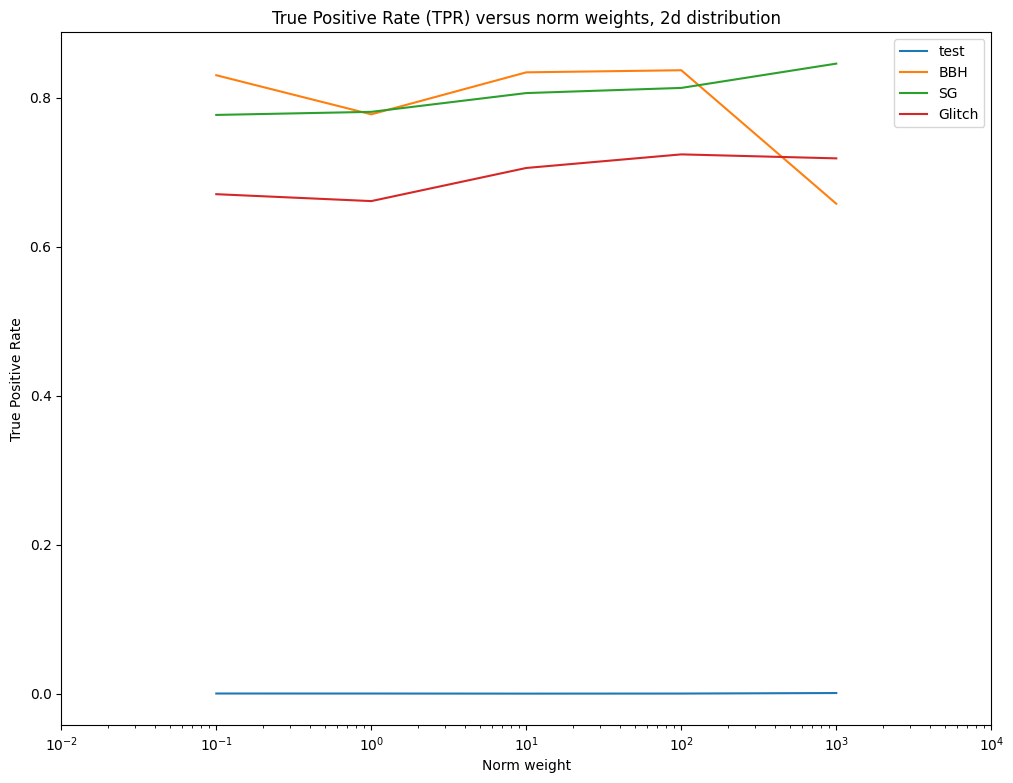

In [3]:
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

TPR_test = [TPR_test_01, TPR_test_1, TPR_test_10, TPR_test_100, TPR_test_1000]
TPR_BBH = [TPR_BBH_01, TPR_BBH_1, TPR_BBH_10, TPR_BBH_100, TPR_BBH_1000]
TPR_SG = [TPR_SG_01, TPR_SG_1, TPR_SG_10, TPR_SG_100, TPR_SG_1000]
TPR_Glitch = [TPR_glitches_01, TPR_glitches_1, TPR_glitches_10, TPR_glitches_100, TPR_glitches_1000]
Weights = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(12, 9))

plt.plot(Weights, TPR_test, label = 'test')
plt.plot(Weights, TPR_BBH, label = 'BBH')
plt.plot(Weights, TPR_SG, label = 'SG')
plt.plot(Weights, TPR_Glitch, label = 'Glitch')

plt.xlim(1e-2, 1e4)
plt.xlabel('Norm weight')
plt.ylabel('True Positive Rate')
plt.xscale('log')
plt.title('True Positive Rate (TPR) versus norm weights, 2d distribution')
plt.legend()
plt.show()

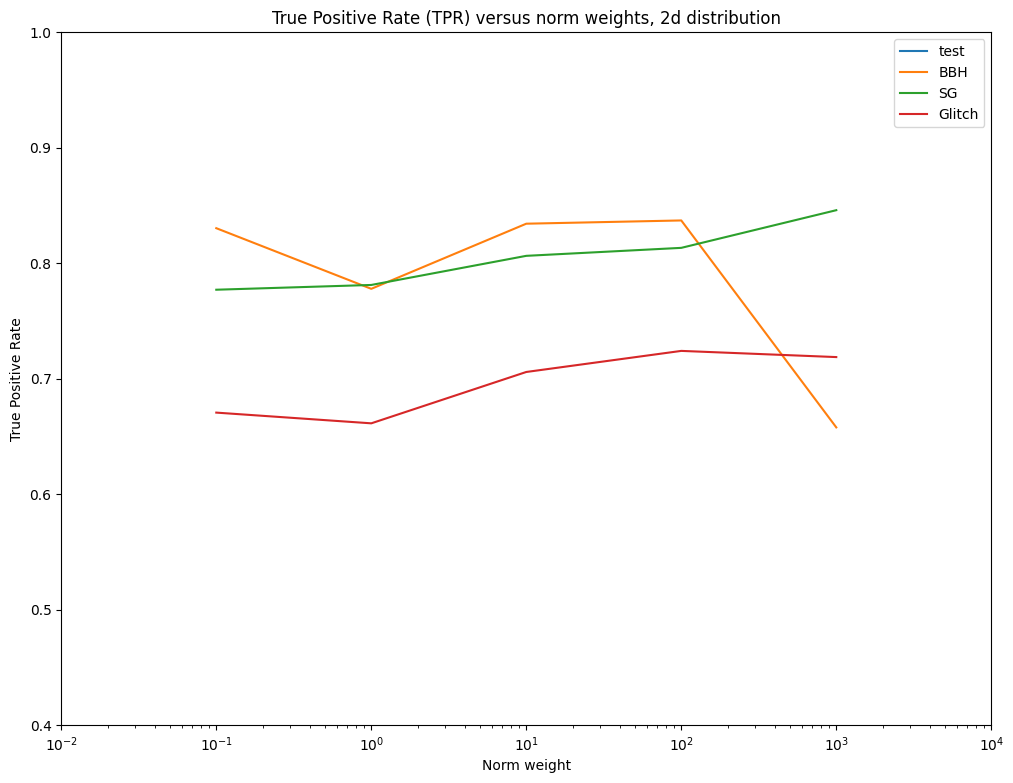

In [4]:
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

TPR_test = [TPR_test_01, TPR_test_1, TPR_test_10, TPR_test_100, TPR_test_1000]
TPR_BBH = [TPR_BBH_01, TPR_BBH_1, TPR_BBH_10, TPR_BBH_100, TPR_BBH_1000]
TPR_SG = [TPR_SG_01, TPR_SG_1, TPR_SG_10, TPR_SG_100, TPR_SG_1000]
TPR_Glitch = [TPR_glitches_01, TPR_glitches_1, TPR_glitches_10, TPR_glitches_100, TPR_glitches_1000]
Weights = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(12, 9))

plt.plot(Weights, TPR_test, label = 'test')
plt.plot(Weights, TPR_BBH, label = 'BBH')
plt.plot(Weights, TPR_SG, label = 'SG')
plt.plot(Weights, TPR_Glitch, label = 'Glitch')

plt.xlim(1e-2, 1e4)
plt.ylim(0.4, 1)
plt.xlabel('Norm weight')
plt.ylabel('True Positive Rate')
plt.xscale('log')
plt.title('True Positive Rate (TPR) versus norm weights, 2d distribution')
plt.legend()
plt.show()

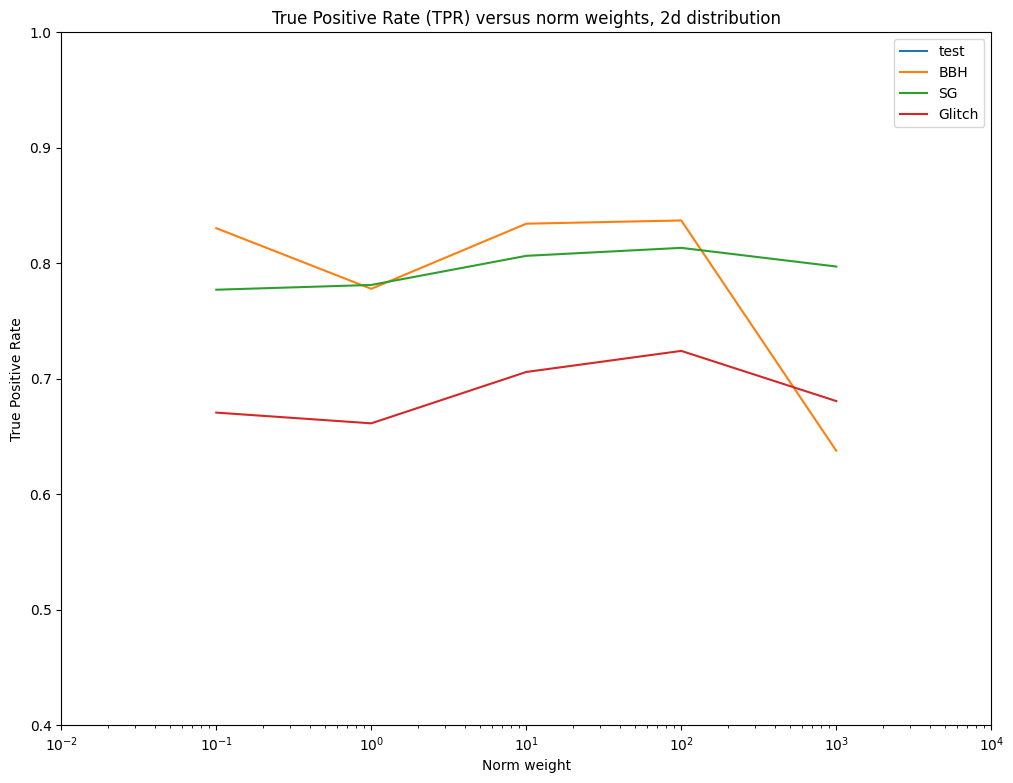

In [6]:
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

TPR_test = [TPR_test_01, TPR_test_1, TPR_test_10, TPR_test_100, TPR_test_1000]
TPR_BBH = [TPR_BBH_01, TPR_BBH_1, TPR_BBH_10, TPR_BBH_100, TPR_BBH_1000]
TPR_SG = [TPR_SG_01, TPR_SG_1, TPR_SG_10, TPR_SG_100, TPR_SG_1000]
TPR_Glitch = [TPR_glitches_01, TPR_glitches_1, TPR_glitches_10, TPR_glitches_100, TPR_glitches_1000]
Weights = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(12, 9))

plt.plot(Weights, TPR_test, label = 'test')
plt.plot(Weights, TPR_BBH, label = 'BBH')
plt.plot(Weights, TPR_SG, label = 'SG')
plt.plot(Weights, TPR_Glitch, label = 'Glitch')

plt.xlim(1e-2, 1e4)
plt.ylim(0.4, 1)
plt.xlabel('Norm weight')
plt.ylabel('True Positive Rate')
plt.xscale('log')
plt.title('True Positive Rate (TPR) versus norm weights, 2d distribution')
plt.legend()
plt.show()

In [ ]:
TPR_glitches_01 = 0.22471428571428573
TPR_SG_01 = 0.19114285714285714
TPR_BBH_01 = 0.033771667662881054

TPR_glitches_1 = 0.661294964028777
TPR_SG_1 = 0.7810959698463322
TPR_BBH_1 = 0.7777441790142122

TPR_glitches_10 = 0.7057550843790567
TPR_SG_10 = 0.8063076036866359
TPR_BBH_10 = 0.8341346153846154

TPR_glitches_100 = 0.7240034662045061
TPR_SG_100 = 0.8132183908045977
TPR_BBH_100 = 0.8369434416365824

TPR_glitches_1000 = 0.6805576834686686
TPR_SG_1000 = 0.7970553789526519
TPR_BBH_1000 = 0.6375404530744336


In [7]:
import h5py

In [8]:
test = h5py.File('../Data_cached/BBH_0.h5')

In [13]:
test['H1'][0]

array([ 6.97514411e-23,  6.84478398e-23,  6.71266908e-23, ...,
       -4.25945612e-32, -1.89536447e-32,  0.00000000e+00])

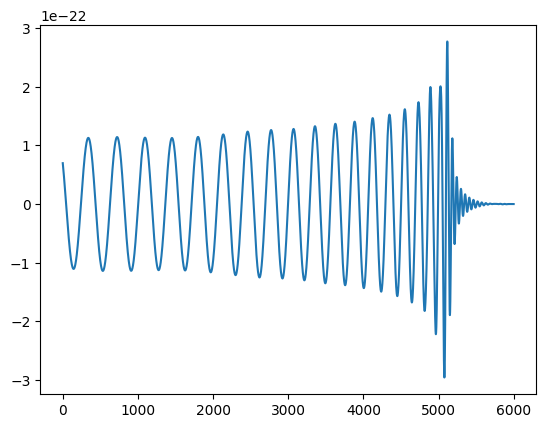

In [14]:
plt.plot(test['H1'][0])

In [381]:
1

1